哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [25]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_a=pd.DataFrame(pd.read_csv('A_lvr_land_A.csv'))
df_b=pd.DataFrame(pd.read_csv('B_lvr_land_A.csv'))
df_e=pd.DataFrame(pd.read_csv('E_lvr_land_A.csv'))
df_f=pd.DataFrame(pd.read_csv('F_lvr_land_A.csv'))

C:\Users\avalin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_a

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,文山區,房地(土地+建物),興隆路三段61~90號,15.78,其他,NaN,NaN,1090712,土地2建物1車位0,十層，電梯樓梯間,...,165025,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPPNMLSJRHPFFAA48DA,35.33,0.00,0.00,有
8838,文山區,房地(土地+建物),仙岩路16巷31~60號,10.57,其他,NaN,NaN,1090815,土地1建物1車位0,三層,...,127510,NaN,0.0,0,NaN,RPQNMLSJRHPFFAA58DA,17.82,2.88,0.00,有
8839,文山區,房地(土地+建物),興隆路三段255巷1~30號,13.78,其他,NaN,NaN,1090622,土地3建物1車位0,二層,...,128205,NaN,0.0,0,獨立產權公設未包含建物棟數內其他增建;,RPRNMLSJRHPFFAA68DA,20.20,5.22,0.01,有
8840,文山區,房地(土地+建物),興隆路三段207巷18弄1~30號,24.12,其他,NaN,NaN,1090626,土地1建物1車位0,三層,...,97157,NaN,0.0,0,陽台外推;,RPVNMLRJRHPFFAA98DA,67.47,0.00,14.11,無


In [4]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
df_a=df_a.drop([0])
df_b=df_b.drop([0])
df_e=df_e.drop([0])
df_f=df_f.drop([0])

In [5]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
df_a['city']='Taipei'
df_b['city']='Taichung'
df_e['city']='Kaohsiung'
df_f['city']='New_Taipei'

In [6]:
#4. 將以上四份資料運用pd.concat()串接
df=pd.concat([df_a,df_b,df_e,df_f], ignore_index=True)
df

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,New_Taipei
59472,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,New_Taipei
59473,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,New_Taipei
59474,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [7]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [8]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df.rename(columns=columns_mapping, inplace=True)

In [9]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_new=df[analysis_columns]
df_new=df_new[df_new['use_zoning']=='住']
df_new.dropna()
df_new.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2


In [10]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_new=df_new.astype(columns_type)

In [11]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df_new['tx_dt_year']=df_new['tx_dt'].astype(str).apply(lambda x:x[:3])

filter1=df_new['tx_dt_year']=='109'
filter2=df_new['room_number']>=1
filter2_2=df_new['room_number']<=5
filter3=df_new['hall_number']>=1
filter3_2=df_new['hall_number']<=2

df_new[filter1&filter2&filter2_2&filter3&filter3_2]

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57726,New_Taipei,永和區,見其他登記事項,住,27450000,168.51,84.43,1090731,194003.0,3,2,2,109
58079,New_Taipei,永和區,見其他登記事項,住,15800000,107.53,47.34,1090806,192334.0,2,2,1,109
58171,New_Taipei,永和區,見其他登記事項,住,25100000,132.73,84.43,1090628,189106.0,3,2,2,109
58815,New_Taipei,永和區,見其他登記事項,住,15980000,107.36,47.22,1090724,195306.0,2,2,1,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [12]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df_new['building_area_square_feet']=df['land_area_square_meter'].astype(float)*0.3025
df_new['main_building_area_square_feet']=df['main_building_area']*0.3025
df_new['unit_price_square_feet']=df['unit_price'].astype(float)/0.3025

In [13]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df_new.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,1.717900e+04,17179.000000,17179.000000,1.682300e+04,17179.000000,17179.000000,17179.000000,17179.000000,17179.000000,1.682300e+04
mean,1.431101e+07,130.023182,85.048515,9.333964e+04,2.658537,1.603237,1.802724,17.955659,25.727176,3.085608e+05
std,3.275005e+07,102.595531,79.992126,6.797021e+04,1.808522,0.894598,1.643484,74.548430,24.197618,2.246949e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.700000e+06,80.150000,49.655000,5.313250e+04,2.000000,1.000000,1.000000,4.749250,15.020637,1.756446e+05
50%,9.450000e+06,118.000000,76.280000,7.583700e+04,3.000000,2.000000,2.000000,7.465700,23.074700,2.507008e+05
75%,1.500000e+07,168.870000,101.580000,1.151330e+05,3.000000,2.000000,2.000000,13.071025,30.727950,3.806050e+05
max,1.462799e+09,5857.910000,5857.910000,1.936000e+06,71.000000,22.000000,71.000000,4247.432750,1772.017775,6.400000e+06


In [14]:
#移除unit_price_square_feet最小值為0 主建物面積main_building_area最小為0
df_new.loc[(df_new['unit_price_square_feet']!=0)&(df_new['main_building_area_square_feet']!=0)]
df_new.describe()
# 移除後再用.describe()觀察是否還有奇怪的資料?
#否

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,1.717900e+04,17179.000000,17179.000000,1.682300e+04,17179.000000,17179.000000,17179.000000,17179.000000,17179.000000,1.682300e+04
mean,1.431101e+07,130.023182,85.048515,9.333964e+04,2.658537,1.603237,1.802724,17.955659,25.727176,3.085608e+05
std,3.275005e+07,102.595531,79.992126,6.797021e+04,1.808522,0.894598,1.643484,74.548430,24.197618,2.246949e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5.700000e+06,80.150000,49.655000,5.313250e+04,2.000000,1.000000,1.000000,4.749250,15.020637,1.756446e+05
50%,9.450000e+06,118.000000,76.280000,7.583700e+04,3.000000,2.000000,2.000000,7.465700,23.074700,2.507008e+05
75%,1.500000e+07,168.870000,101.580000,1.151330e+05,3.000000,2.000000,2.000000,13.071025,30.727950,3.806050e+05
max,1.462799e+09,5857.910000,5857.910000,1.936000e+06,71.000000,22.000000,71.000000,4247.432750,1772.017775,6.400000e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [15]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
df_new.loc[df_new['city']=='Taipei'].corr()[['total_price','unit_price_square_feet']]


,total_price,unit_price_square_feet
total_price,1.000000,0.264613
building_area_square_meter,0.345885,0.015411
main_building_area,0.265142,-0.054708
unit_price,0.264613,1.000000
room_number,0.007927,-0.240915
hall_number,-0.008329,-0.221992
health_number,0.086815,-0.135455
building_area_square_feet,0.846747,0.050447
main_building_area_square_feet,0.265142,-0.054708
unit_price_square_feet,0.264613,1.000000


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

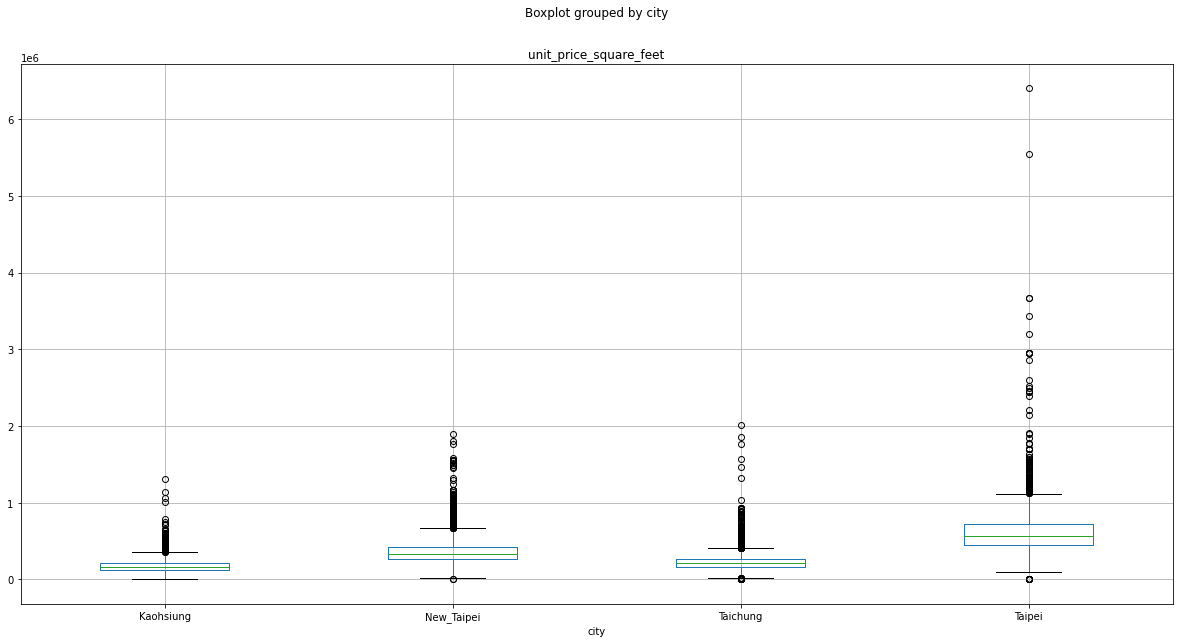

In [19]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
df_new.boxplot(column=['unit_price_square_feet'],by='city',figsize=(20,10))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

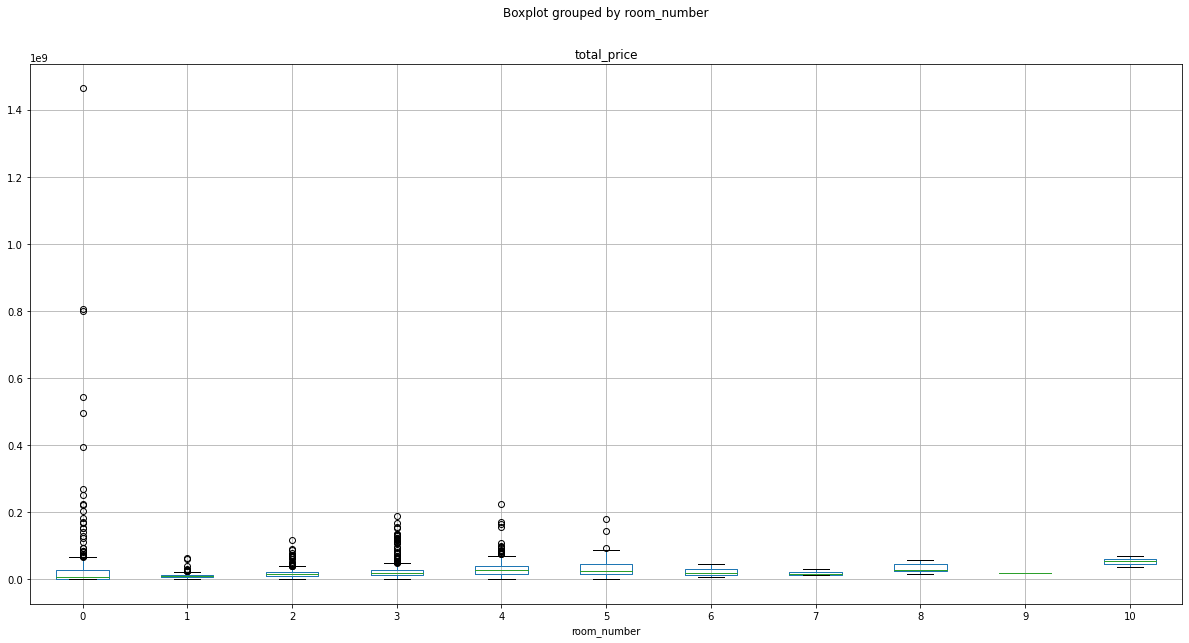

In [30]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
df_new.loc[df_new['city']=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(20,10))


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

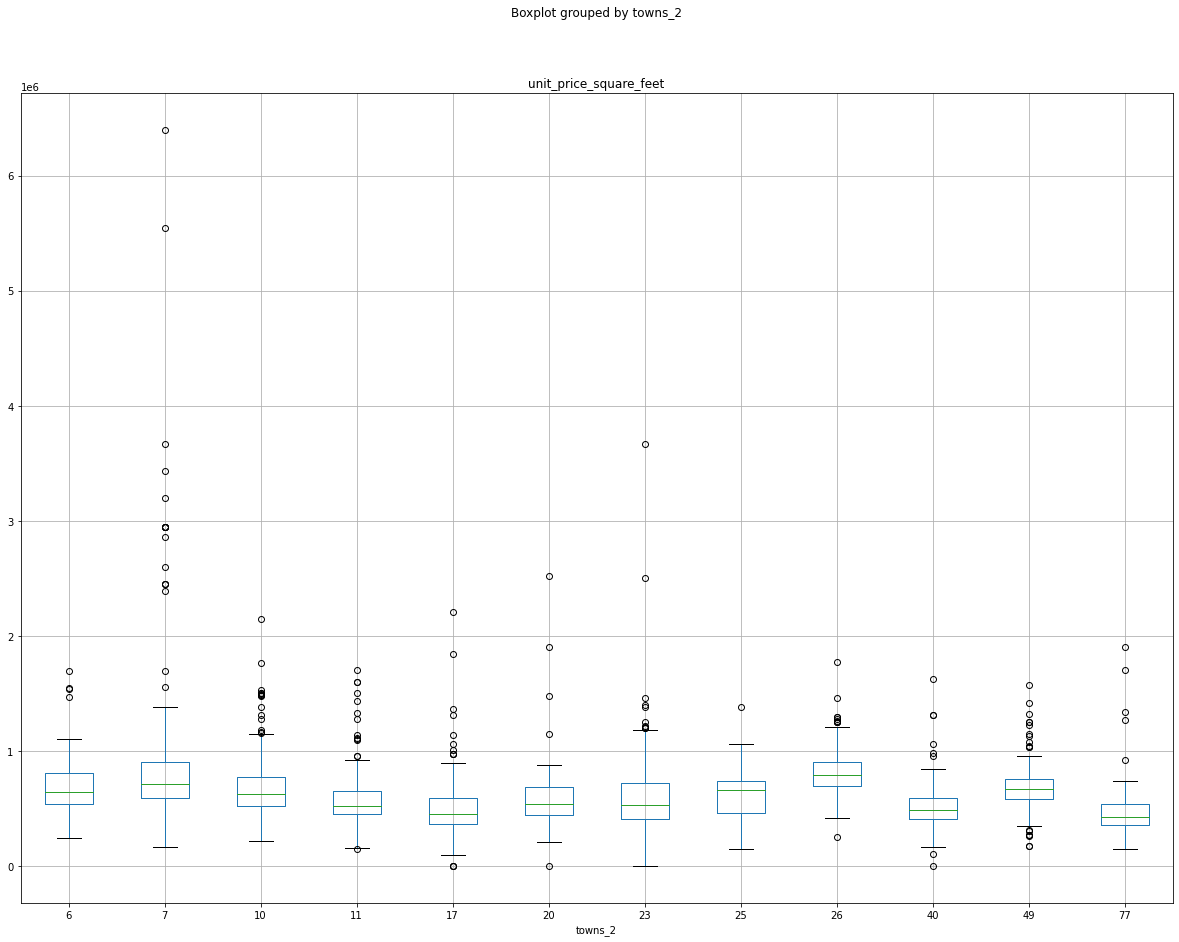

In [34]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
le = LabelEncoder().fit(df_new['towns'].values)
df_new['towns_2'] = le.transform(df_new['towns'].values)
df_new.loc[df_new['city']=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(20,15))

In [35]:
le.inverse_transform([26])

array(['大安區'], dtype=object)